<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/ML-Learning/blob/master/Session_6_Polynomial_Regression/Polynomial_Regression_ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Difference between linear and non-linear models**

In [0]:
#Linear= line
#Non_linear= anything shape apart from line

# **Importing the data**

In [1]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1q8-tWVNRsyOTTeK-TKasK3WeXGJLdgrj'})
# replace the id with id of file you want to access
downloaded.GetContentFile('Position_Salaries_PLR.csv') 

#STEP-4: Read File

#3.1 Read file as panda dataframe
import pandas as pd
data = pd.read_csv('Position_Salaries_PLR.csv') 
print(data.head())

     |████████████████████████████████| 993kB 2.9MB/s 
            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x=data.iloc[:,1:2].values # Giving as 1:2 as a result it has only one column but by that we get matrix.
y=data.iloc[:,2].values

# Here we're having very low no of data and we need all 10 records to predict accurate data.

# Library takes care of feature scaling

# **Fitting linear regression to the dataset**

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x,y)

# This model is created just for comparison purpose

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Fiitting polynomial regression model to the dataset**

In [4]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2) # Degree=2 by default
x_poly=poly_reg.fit_transform(x)
print (x_poly)

# Just see how it looks

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


In [7]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

# Second time creating lin reg model 
# Reason is to FIT this polynomial reg model to that model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Visualization of linear regression model**

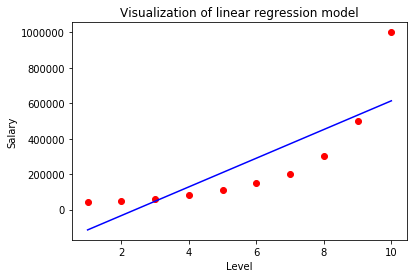

In [5]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg.predict(x),color='blue')
plt.title('Visualization of linear regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# **Visualization of polynomial regression model**

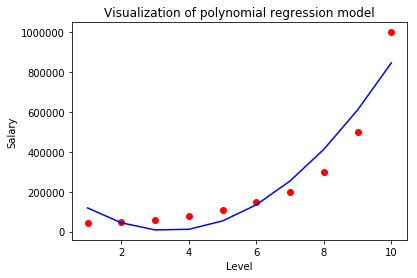

In [8]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(x_poly),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# This shows the polynomial regression model for the defined x

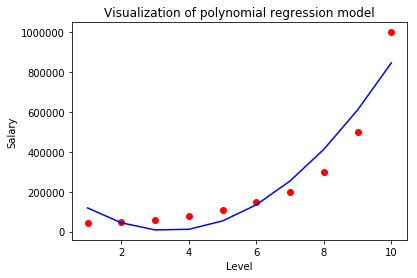

In [9]:
plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# This shows the polynomial regression model for any value of new x

# If we want to find for new matrix d, then replace x by d

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


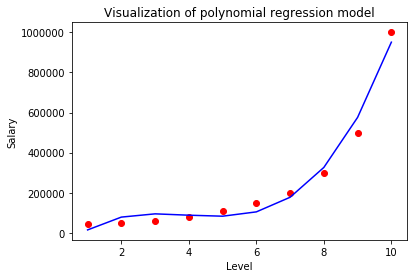

In [10]:
# To make even more accurate, adding degree

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
print (x_poly)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

# Now visualize them

plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


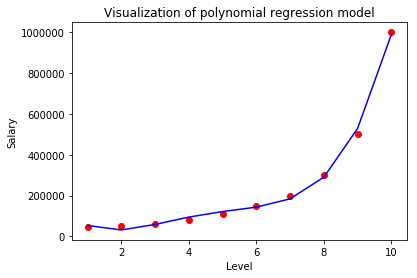

In [11]:
# To make even more accurate, adding degree

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x)
print (x_poly)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

# Now visualize them

plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

[[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01 2.4300e+02]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02 1.0240e+03]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02 3.1250e+03]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03 7.7760e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03 1.6807e+04]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03 3.2768e+04]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03 5.9049e+04]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04 1.0000e+05]]


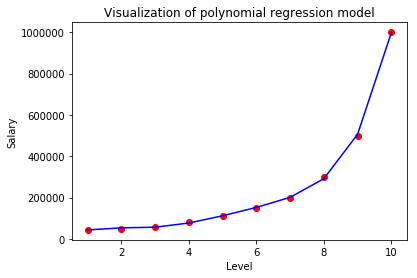

In [12]:
# To make even more accurate, adding degree

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x)
print (x_poly)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

# Now visualize them

plt.scatter(x,y,color='red')
plt.plot(x,lin_reg2.predict(poly_reg.fit_transform(x)),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

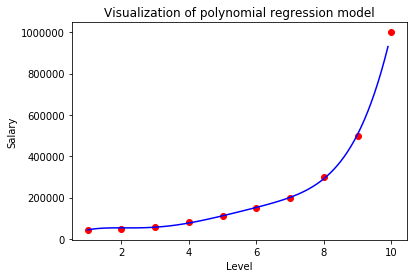

In [13]:
# Now lets create x_grid with more precision of x.

x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('Visualization of polynomial regression model')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

# **Predicting the new value in linear regression model**

In [14]:
print('The prediction for level 6.5 is',lin_reg.predict([[6.5]]))

The prediction for level 6.5 is [330378.78787879]


# **Predicting the new value in polynomial regression model**

In [15]:
print('The prediction for level 6.5 is',lin_reg2.predict(poly_reg.fit_transform([[6.5]])))

The prediction for level 6.5 is [174878.07765172]
